In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard
import os
import cv2

In [ ]:
# Load dataset
data_dir = '/content/data'
data = tf.keras.utils.image_dataset_from_directory(data_dir, image_size=(256, 256), batch_size=2, color_mode="grayscale")

Found 20 files belonging to 2 classes.


Images shape: (2, 256, 256, 1)
Labels: [1 1]


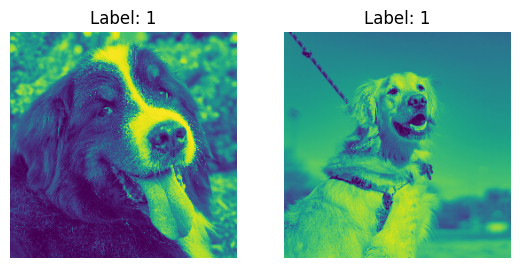

In [ ]:
import matplotlib.pyplot as plt

# Iterasi dataset
for images, labels in data.take(1):  # Ambil satu batch pertama
    print(f'Images shape: {images.shape}')
    print(f'Labels: {labels.numpy()}')

    # Tampilkan beberapa gambar
    plt.figure(figsize=(10, 10))
    for i in range(2):  # Tampilkan 2 gambar pertama
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f'Label: {labels[i].numpy()}')
        plt.axis("off")
    plt.show()


In [ ]:
# Split dataset
train_size = int(0.7 * len(data))
val_size = int(0.2 * len(data))
test_size = int(0.1 * len(data))

print(train_size, val_size, test_size)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

7 2 1


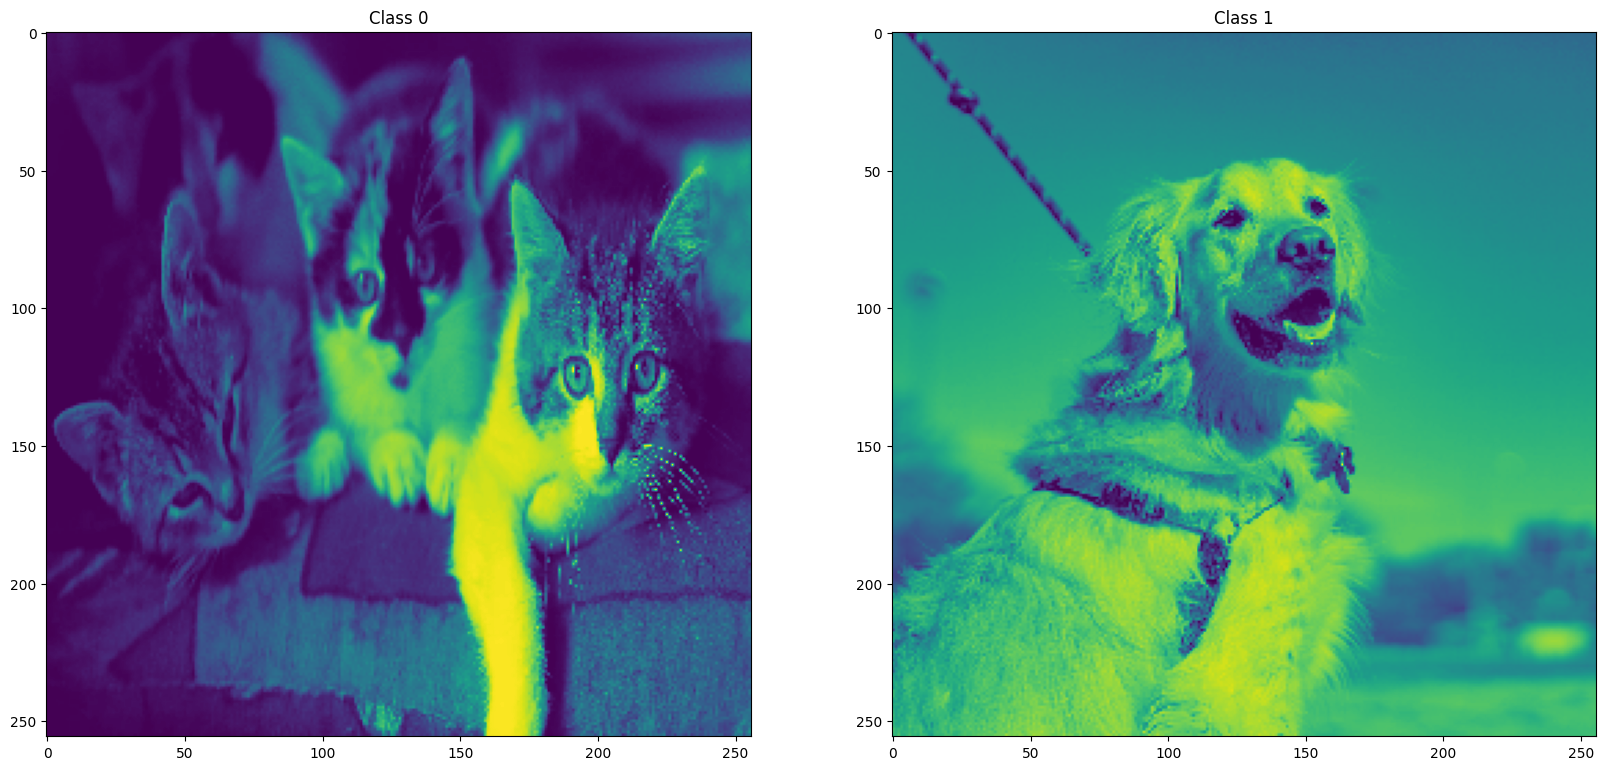

In [ ]:
# Visualize the data
data_iterator = train.as_numpy_iterator()
batch = data_iterator.next()

fig, ax = plt.subplots(ncols=2, figsize=(20, 20))
for idx, img in enumerate(batch[0][:2]):
    ax[idx].imshow(img.astype('uint8'))
    ax[idx].title.set_text('Class ' + str(batch[1][idx]))
plt.show()

In [ ]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    # Conv2D(128, (3, 3), activation='relu', padding='same'),
    # MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(2, activation='sigmoid')  # Binary classification
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# Display model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 256, 256, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 262144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │      67,109,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,128,450 (256.07 MB)

 Trainable params: 67,128,450 (256.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Set up TensorBoard
logdir = 'logs'
tensorboard_callback = TensorBoard(log_dir=logdir)

In [ ]:
# Train the model
hist = model.fit(train, validation_data=val, epochs=32, callbacks=[tensorboard_callback])

Epoch 1/32
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 1.0000 - loss: 1.8062e-05 - val_accuracy: 1.0000 - val_loss: 1.8775e-06
Epoch 2/32
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 1.0000 - loss: 6.8286e-05 - val_accuracy: 1.0000 - val_loss: 7.1525e-07
Epoch 3/32
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 2.9802e-08
Epoch 4/32
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 1.0000 - loss: 3.4568e-05 - val_accuracy: 1.0000 - val_loss: 2.9802e-08
Epoch 5/32
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 1.0000 - loss: 3.2656e-06 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/32
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 1.0000 - loss: 2.4166e-07 - val_accuracy: 1.0000 - val_loss: 5.6624e-07
Epoch 7/32
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 1.0000 - loss: 2.8575e-06 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/32
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 1.0000 - los

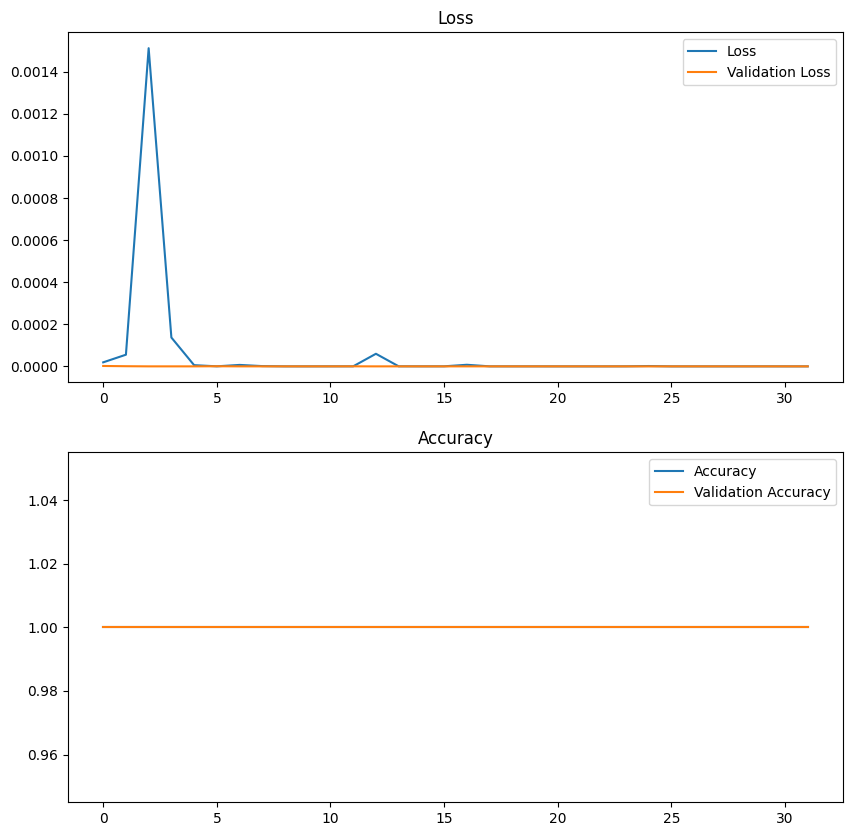

In [ ]:
# Plot loss and accuracy
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(hist.history['loss'], label='Loss')
ax[0].plot(hist.history['val_loss'], label='Validation Loss')
ax[0].legend()
ax[0].set_title('Loss')

ax[1].plot(hist.history['accuracy'], label='Accuracy')
ax[1].plot(hist.history['val_accuracy'], label='Validation Accuracy')
ax[1].legend()
ax[1].set_title('Accuracy')
plt.show()

In [ ]:
# Evaluate model on the test set
test_metrics = model.evaluate(test)
print(f"Test Loss: {test_metrics[0]}, Test Accuracy: {test_metrics[1]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 1.0000 - loss: 7.7486e-07
Test Loss: 7.748597568024707e-07, Test Accuracy: 1.0


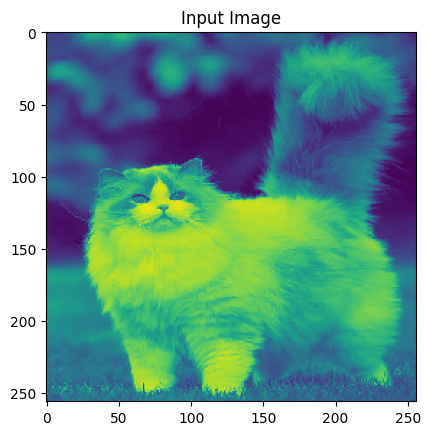

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
Cat
[[0.7293749  0.28462476]] 0


In [ ]:
# Test the model with a sample image
test_img = tf.keras.utils.load_img("/content/cat_test.jpg", target_size=(256, 256))  # Resize to match model input size
test_img = tf.image.rgb_to_grayscale(test_img)
test_img = tf.keras.utils.img_to_array(test_img)
test_label = 0

plt.imshow(test_img.astype('uint8'))
plt.title('Input Image')
plt.show()

yhat = model.predict(np.expand_dims(test_img, axis=0))
yidx = np.argmax(yhat)

if yidx == 1:
  print("Dog")
else:
  print("Cat")
print(yhat, test_label)

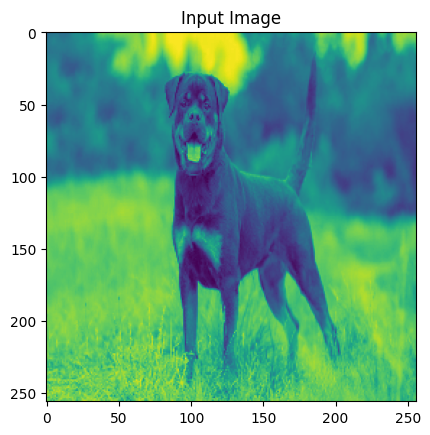

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Dog
[[0.6027493 0.6733868]] 1


In [ ]:
# Test the model with a sample image
test_img = tf.keras.utils.load_img("/content/dog_test2.jpg", target_size=(256, 256))  # Resize to match model input size
test_img = tf.image.rgb_to_grayscale(test_img)
test_img = tf.keras.utils.img_to_array(test_img)
test_label = 1

plt.imshow(test_img.astype('uint8'))
plt.title('Input Image')
plt.show()

yhat = model.predict(np.expand_dims(test_img, axis=0))
yidx = np.argmax(yhat)

if yidx == 1:
  print("Dog")
else:
  print("Cat")
print(yhat, test_label)